In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background') #для сохранности глаз

### Ознакамливаемся

In [593]:
import chardet

with open('/content/drive/MyDrive/Colab Notebooks/Bank/МТС/MTS.txt', 'rb') as f:
    enc = chardet.detect(f.read())
    print(enc)
    
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank/МТС/MTS.txt', sep=';', encoding = enc['encoding'])

{'encoding': 'windows-1251', 'confidence': 0.8747323361893824, 'language': 'Russian'}


In [594]:
df.head(5)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта


In [595]:
# Количество значений в разных категориях
pd.DataFrame(df.nunique(), columns = ['Количество']).T

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
Количество,12,205,22,66,2,6,22,2,3,76,3,5,2,2


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1723 non-null   int64 
 1   Сумма кредита               1723 non-null   int64 
 2   Срок кредита                1723 non-null   int64 
 3   Возраст клиента             1723 non-null   int64 
 4   Пол клиента                 1723 non-null   object
 5   Образование клиента         1723 non-null   object
 6   Тип товара                  1723 non-null   object
 7   Наличие детей у клиента     1723 non-null   object
 8   Регион выдачи кредита       1723 non-null   object
 9   Доход клиента               1723 non-null   int64 
 10  Семейное положение          1723 non-null   object
 11  Оператор связи              1723 non-null   object
 12  Является ли клиентом банка  1723 non-null   object
 13  Флаг дефолта по кредиту     1723 non-null   obje

In [597]:
df.describe()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,32652.350551
std,3.538420,27926.778301,6.548354,13.120203,20913.193158
min,1.000000,5000.000000,3.000000,18.000000,1000.000000
25%,3.000000,13000.000000,6.000000,26.000000,21000.000000
50%,7.000000,21500.000000,12.000000,32.000000,27000.000000
75%,10.000000,34000.000000,12.000000,44.000000,38000.000000
max,12.000000,301000.000000,36.000000,90.000000,401000.000000


In [598]:
num_col = df.select_dtypes(np.number).columns.to_list()
cat_col = df.select_dtypes(object).columns.to_list()

### Находим связи

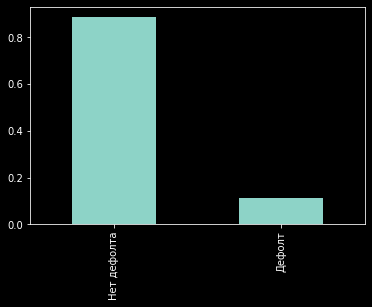

In [599]:
df['Флаг дефолта по кредиту'].value_counts(normalize=True).plot(kind='bar'); #несбалансированные классы

In [600]:
df['Флаг дефолта по кредиту'] = df['Флаг дефолта по кредиту'].map({'Нет дефолта':0, 'Дефолт':1})

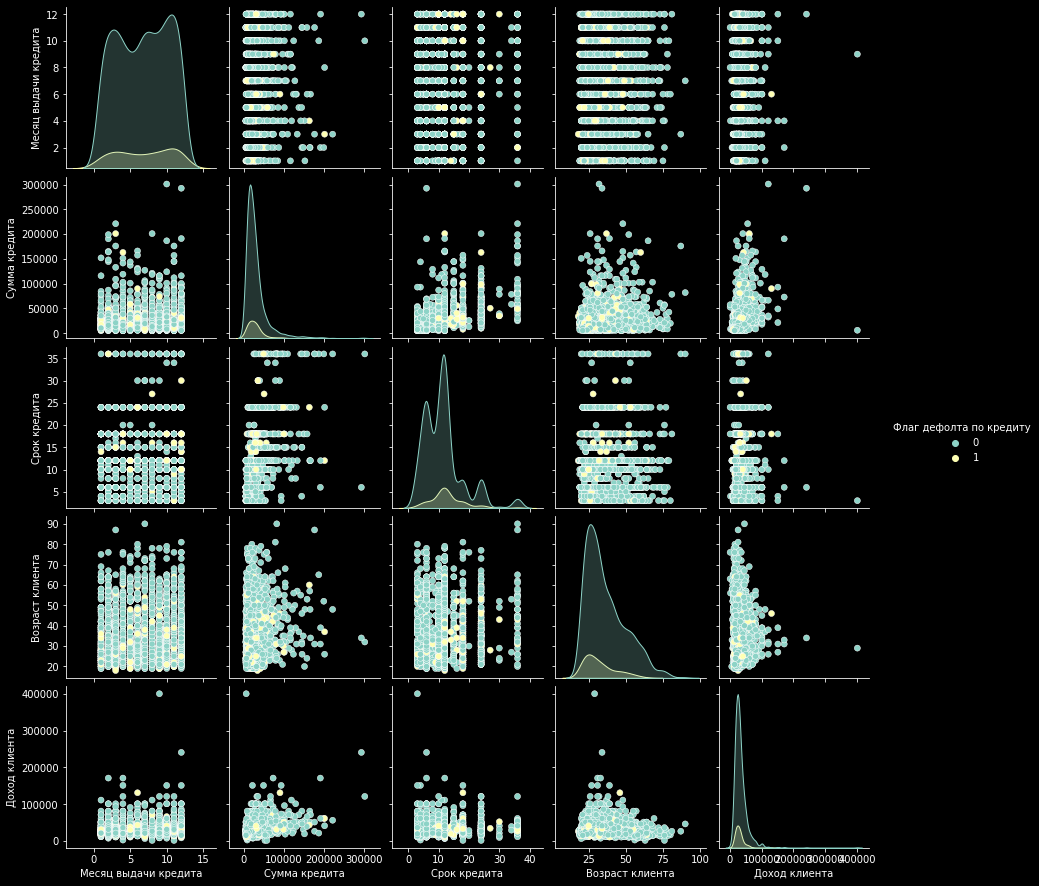

In [601]:
sns.pairplot(df, hue='Флаг дефолта по кредиту');

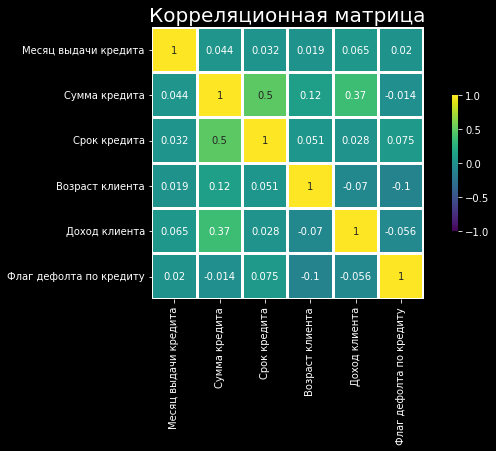

In [602]:
plt.subplots(figsize=(10, 5))
plt.title('Корреляционная матрица', fontsize = 20)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'viridis', linewidths=2, square=True, center=0, cbar_kws={'shrink': .5});

In [603]:
df.corrwith(df['Флаг дефолта по кредиту']).to_frame().sort_values(0).rename(columns={0:'Корреляция с таргетом'})

,Корреляция с таргетом
Возраст клиента,-0.102110
Доход клиента,-0.056292
Сумма кредита,-0.014035
Месяц выдачи кредита,0.019749
Срок кредита,0.074508
Флаг дефолта по кредиту,1.000000


In [604]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [605]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Месяц выдачи кредита', 'Сумма кредита', 'Срок кредита', 'Возраст клиента', 'Доход клиента', 'Флаг дефолта по кредиту']


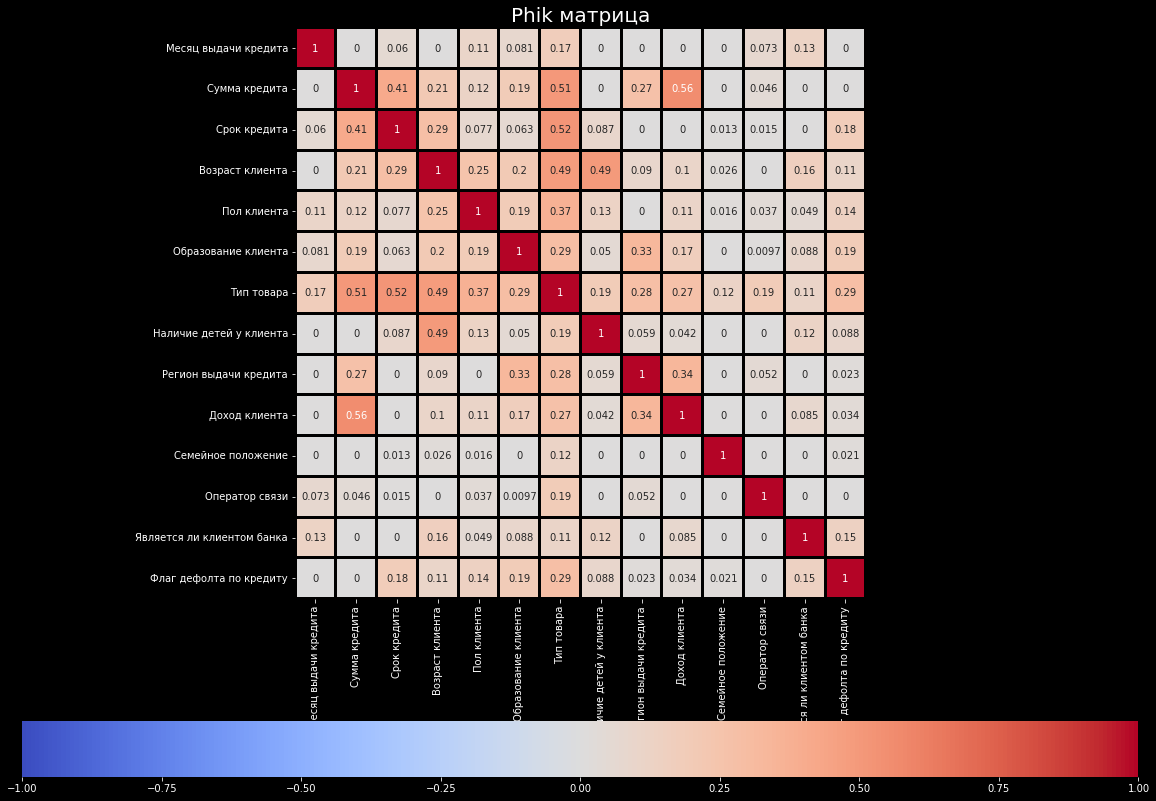

In [606]:
plt.subplots(figsize=(20, 15))
plt.title('Phik матрица', fontsize = 20)
sns.heatmap(phik_overview, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm', linewidths=2, square=True, center=0, fmt='.2g',
            linecolor='black', cbar_kws= {'orientation': 'horizontal'});

In [607]:
phik_overview['Флаг дефолта по кредиту'].sort_values(ascending=False).to_frame()

,Флаг дефолта по кредиту
Флаг дефолта по кредиту,1.000000
Тип товара,0.285452
Образование клиента,0.194005
Срок кредита,0.183182
Является ли клиентом банка,0.147239
Пол клиента,0.140966
Возраст клиента,0.109181
Наличие детей у клиента,0.087549
Доход клиента,0.033898
Регион выдачи кредита,0.022923


### Проверка связей

**Тип товара**

In [608]:
df.groupby('Тип товара')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('mean', ascending=False)
#при покупки мобильного телефона веротность дефолта наибольшая, по услугам строительства и ремона мало наблюдений

,count,mean
Тип товара,,
Строительные и ремонтные услуги,3,0.333333
Мобильные телефоны,498,0.226908
Ювелирные украшения,36,0.222222
Автомобильные товары,21,0.142857
Строительные материалы и инструменты,30,0.133333
"Мототехника (лодки, мото)",11,0.090909
Косметика и косметические услуги,55,0.090909
Бытовая техника,471,0.076433
Туризм и отдых,37,0.054054


**Образование клиента**

In [609]:
df.groupby('Образование клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('mean', ascending=False)
#наибольшая вероятность дефолта у людей со средним/специальным образованием

,count,mean
Образование клиента,,
Среднее,208,0.192308
Среднее специальное,836,0.138756
Высшее,585,0.059829
Неоконченное высшее,86,0.058140
Неоконченное среднее,5,0.000000
Несколько высших или более высокая ступень образования,3,0.000000


**Срок кредита**

In [610]:
df.groupby('Срок кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
Срок кредита,,
12,557,0.152603
6,349,0.065903
10,207,0.091787
18,122,0.221311
24,121,0.099174
3,94,0.042553
4,67,0.059701
15,53,0.056604
36,37,0.081081


In [611]:
# df['Срок кредита bin'] = pd.qcut(df['Срок кредита'], 10, duplicates='drop')
df['Срок кредита bin'] = pd.cut(df['Срок кредита'], [-float('inf'), 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, float('inf')])
df.groupby('Срок кредита bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
#наибольшая вероятность дефолта кредита от 15-18 месяцев

,count,mean
Срок кредита bin,,
"(-inf, 3.0]",94,0.042553
"(3.0, 6.0]",434,0.064516
"(6.0, 9.0]",58,0.086207
"(9.0, 12.0]",777,0.133848
"(12.0, 15.0]",58,0.103448
"(15.0, 18.0]",132,0.242424
"(18.0, 21.0]",3,0.000000
"(21.0, 24.0]",121,0.099174
"(24.0, 27.0]",1,1.000000


**Является ли клиентом банка**

In [612]:
df.groupby('Является ли клиентом банка')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Является ли клиентом банка,,
Клиент банка,1042,0.139155
Не клиент банка,681,0.074890


**Пол клиента**

In [613]:
df.groupby('Пол клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Пол клиента,,
Женский,792,0.146465
Мужской,931,0.085929


**Возраст клиента**

In [614]:
t = df.groupby('Возраст клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean']) #непонятно
t

,count,mean
Возраст клиента,,
18,1,1.000000
19,15,0.266667
20,44,0.136364
21,65,0.123077
22,70,0.185714
...,...,...
79,1,0.000000
80,1,0.000000
81,1,0.000000


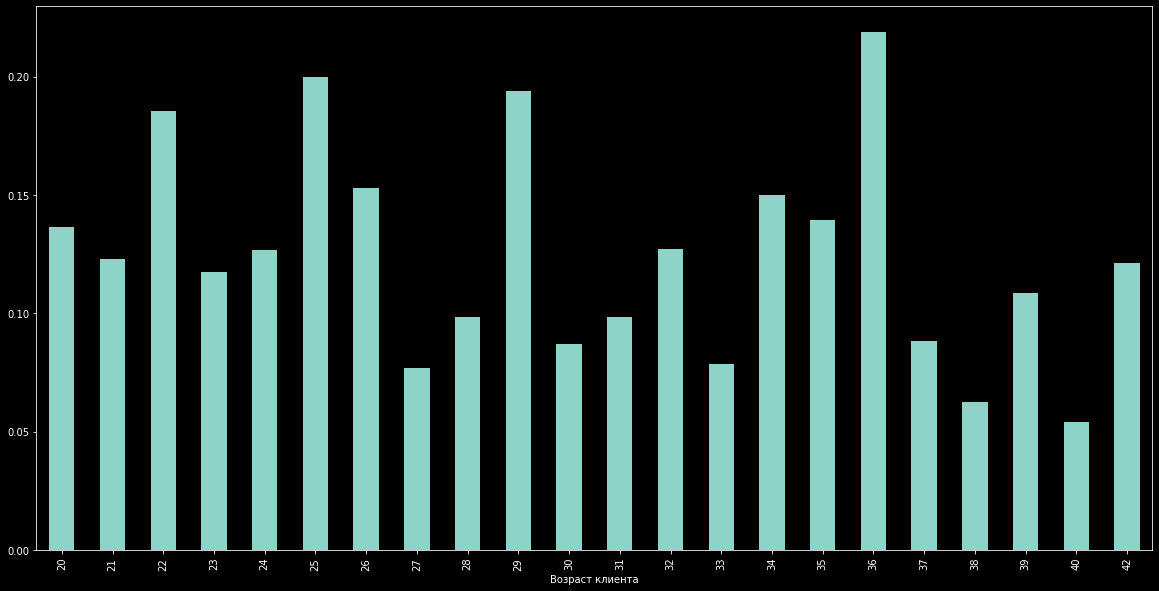

In [615]:
t[t['count']>30]['mean'].plot(kind='bar', figsize=(20,10));
#25, 29, 36 наибольшая вероятность дефолта, при условии что наблюдений более 30

In [616]:
# df['Возраст клиента bin'] = pd.qcut(df['Возраст клиента'], 10, duplicates='drop')
df['Возраст клиента bin'] = pd.cut(df['Возраст клиента'], [-float('inf'), 21, 24, 27, 30, 36, 40, 55, 56, float('inf')])
df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Возраст клиента bin,,
"(-inf, 21.0]",125,0.152000
"(21.0, 24.0]",234,0.141026
"(24.0, 27.0]",207,0.144928
"(27.0, 30.0]",197,0.126904
"(30.0, 36.0]",292,0.126712
"(36.0, 40.0]",149,0.080537
"(40.0, 55.0]",344,0.098837
"(55.0, 56.0]",18,0.055556
"(56.0, inf]",157,0.031847


**Наличие детей у клиента**

In [617]:
df.groupby('Наличие детей у клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Наличие детей у клиента,,
Детей нет,985,0.130964
Дети есть,738,0.090786


**Доход клиента**

In [618]:
t = df.groupby('Доход клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
t

,count,mean
Доход клиента,,
1000,2,0.0
2000,1,0.0
6000,1,0.0
7000,2,0.0
8000,3,0.0
...,...,...
131000,1,1.0
151000,3,0.0
171000,2,0.0


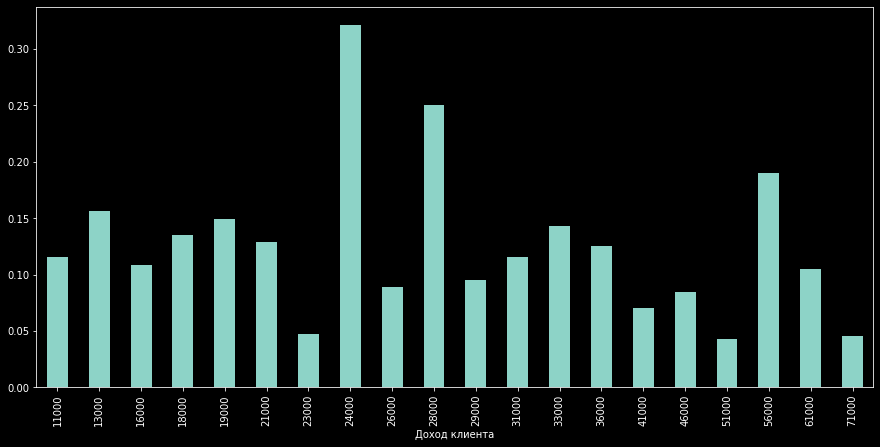

In [619]:
t[t['count']>20]['mean'].plot(kind='bar', figsize=(15,7));
#наибольшая вероятность дефолта у людей с доходом 24к

In [620]:
# df['Доход клиента bin'] = pd.qcut(df['Доход клиента'], 6, duplicates='drop')
df['Доход клиента bin'] = pd.cut(df['Доход клиента'], [-float('inf'), 25000, 50000, 75000, 100000, float('inf')])
df.groupby('Доход клиента bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Доход клиента bin,,
"(-inf, 25000.0]",625,0.129600
"(25000.0, 50000.0]",867,0.114187
"(50000.0, 75000.0]",172,0.087209
"(75000.0, 100000.0]",30,0.000000
"(100000.0, inf]",29,0.034483


**Регион выдачи кредита**

In [621]:
df.groupby('Регион выдачи кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Регион выдачи кредита,,
Другие регионы,1414,0.120934
Москва или МО,240,0.087500
Санкт-Петербург или ЛО,69,0.057971


**Семейное положение**

In [622]:
df.groupby('Семейное положение')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Семейное положение,,
Другое,1201,0.104080
Женат/замужем,444,0.139640
Никогда не был(а) женат/замужем,78,0.115385


**Месяц выдачи кредита**

In [623]:
t = df.groupby('Месяц выдачи кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
t

,count,mean
Месяц выдачи кредита,,
1,139,0.136691
2,138,0.072464
3,158,0.139241
4,131,0.099237
5,116,0.112069
6,122,0.114754
7,145,0.062069
8,142,0.126761
9,136,0.095588


In [624]:
df['Времена года'] = pd.cut(df['Месяц выдачи кредита'], [-float('inf'), 3, 6, 9, float('inf')])
df.groupby('Времена года')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Времена года,,
"(-inf, 3.0]",435,0.117241
"(3.0, 6.0]",369,0.108401
"(6.0, 9.0]",423,0.094563
"(9.0, inf]",496,0.131048


In [625]:
# df['четный/нечетный месяц'] = [1 if i%2==0 else 0 for i in df['Месяц выдачи кредита']]
# df.groupby('четный/нечетный месяц')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

**Сумма кредита**

In [626]:
t = df.groupby('Сумма кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean',])
t

,count,mean
Сумма кредита,,
5000,13,0.076923
5500,17,0.000000
6000,16,0.187500
6500,24,0.208333
7000,27,0.037037
...,...,...
199000,1,0.000000
201000,2,0.500000
221000,1,0.000000


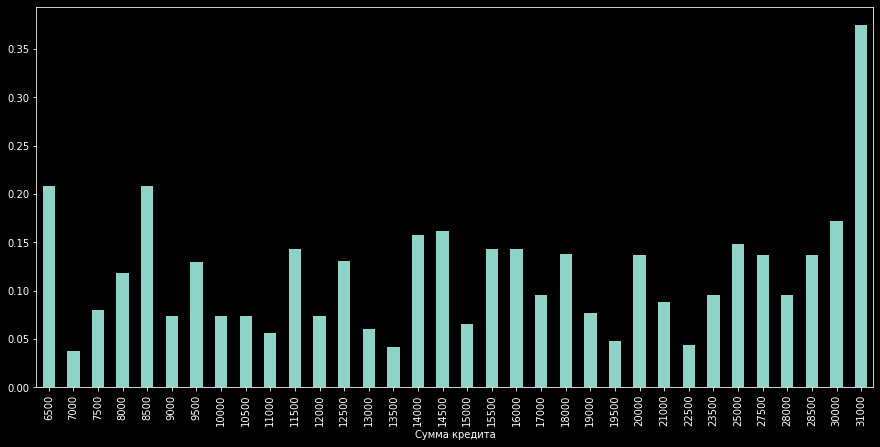

In [627]:
t[t['count'] > 20]['mean'].plot(kind='bar', figsize=(15,7));

In [628]:
df['Сумма кредита bin'] = pd.cut(df['Сумма кредита'], [-float('inf'), 15000, 30000, 45000, float('inf')])
df.groupby('Сумма кредита bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Сумма кредита bin,,
"(-inf, 15000.0]",571,0.101576
"(15000.0, 30000.0]",619,0.111470
"(30000.0, 45000.0]",286,0.157343
"(45000.0, inf]",247,0.097166


**Оператор связи**

In [629]:
df.groupby('Оператор связи')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Оператор связи,,
Билайн,317,0.088328
Другой,27,0.111111
МТС,536,0.123134
Мегафон,666,0.121622
Теле2,177,0.101695


### Кодируем категориальные фичи, генерируем новые основываясь на проверенных связях.

In [630]:
df

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Срок кредита bin,Возраст клиента bin,Доход клиента bin,Времена года,Сумма кредита bin
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,0,"(9.0, 12.0]","(36.0, 40.0]","(-inf, 25000.0]","(-inf, 3.0]","(-inf, 15000.0]"
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,0,"(3.0, 6.0]","(-inf, 21.0]","(-inf, 25000.0]","(-inf, 3.0]","(15000.0, 30000.0]"
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,0,"(9.0, 12.0]","(21.0, 24.0]","(25000.0, 50000.0]","(-inf, 3.0]","(15000.0, 30000.0]"
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,0,"(9.0, 12.0]","(27.0, 30.0]","(25000.0, 50000.0]","(-inf, 3.0]","(-inf, 15000.0]"
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,0,"(9.0, 12.0]","(24.0, 27.0]","(25000.0, 50000.0]","(-inf, 3.0]","(-inf, 15000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,Мужской,Высшее,Мобильные телефоны,Дети есть,Другие регионы,46000,Другое,Мегафон,Клиент банка,0,"(3.0, 6.0]","(30.0, 36.0]","(25000.0, 50000.0]","(9.0, inf]","(15000.0, 30000.0]"
1719,12,6500,6,24,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,18000,Другое,МТС,Клиент банка,0,"(3.0, 6.0]","(21.0, 24.0]","(-inf, 25000.0]","(9.0, inf]","(-inf, 15000.0]"
1720,12,5500,12,21,Мужской,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,15000,Другое,Мегафон,Клиент банка,0,"(9.0, 12.0]","(-inf, 21.0]","(-inf, 25000.0]","(9.0, inf]","(-inf, 15000.0]"
1721,12,30500,10,25,Женский,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,41000,Другое,Билайн,Клиент банка,1,"(9.0, 12.0]","(24.0, 27.0]","(25000.0, 50000.0]","(9.0, inf]","(30000.0, 45000.0]"


In [631]:
# кодирем вероятностью принадлежности к 1 классу (дефолт)
df['Тип товара'] = df['Тип товара'].map(df.groupby('Тип товара')['Флаг дефолта по кредиту'].mean().to_dict())
df['Образование клиента'] = df['Образование клиента'].map(df.groupby('Образование клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Срок кредита'] = df['Срок кредита'].map(df.groupby('Срок кредита')['Флаг дефолта по кредиту'].mean().to_dict())
df['Является ли клиентом банка'] = df['Является ли клиентом банка'].map(df.groupby('Является ли клиентом банка')['Флаг дефолта по кредиту'].mean().to_dict())
df['Пол клиента'] = df['Пол клиента'].map(df.groupby('Пол клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Наличие детей у клиента'] = df['Наличие детей у клиента'].map(df.groupby('Наличие детей у клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Регион выдачи кредита'] = df['Регион выдачи кредита'].map(df.groupby('Регион выдачи кредита')['Флаг дефолта по кредиту'].mean().to_dict())
df['Семейное положение'] = df['Семейное положение'].map(df.groupby('Семейное положение')['Флаг дефолта по кредиту'].mean().to_dict())
df['Оператор связи'] = df['Оператор связи'].map(df.groupby('Оператор связи')['Флаг дефолта по кредиту'].mean().to_dict())
df['Срок кредита bin'] = df['Срок кредита bin'].map(df.groupby('Срок кредита bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Возраст клиента bin'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Доход клиента bin'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Времена года'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Сумма кредита bin'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)

In [632]:
df.info() #astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Месяц выдачи кредита        1723 non-null   int64  
 1   Сумма кредита               1723 non-null   int64  
 2   Срок кредита                1723 non-null   float64
 3   Возраст клиента             1723 non-null   int64  
 4   Пол клиента                 1723 non-null   float64
 5   Образование клиента         1723 non-null   float64
 6   Тип товара                  1723 non-null   float64
 7   Наличие детей у клиента     1723 non-null   float64
 8   Регион выдачи кредита       1723 non-null   float64
 9   Доход клиента               1723 non-null   int64  
 10  Семейное положение          1723 non-null   float64
 11  Оператор связи              1723 non-null   float64
 12  Является ли клиентом банка  1723 non-null   float64
 13  Флаг дефолта по кредиту     1723 

In [633]:
df.head(5)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Срок кредита bin,Возраст клиента bin,Доход клиента bin,Времена года,Сумма кредита bin
0,1,7000,0.152603,39,0.085929,0.138756,0.226908,0.130964,0.120934,21000,0.104080,0.123134,0.074890,0,0.133848,0.080537,0.080537,0.080537,0.080537
1,1,19000,0.065903,20,0.085929,0.138756,0.076433,0.090786,0.120934,17000,0.104080,0.101695,0.139155,0,0.064516,0.152000,0.152000,0.152000,0.152000
2,1,29000,0.152603,23,0.146465,0.138756,0.076433,0.130964,0.120934,31000,0.104080,0.088328,0.074890,0,0.133848,0.141026,0.141026,0.141026,0.141026
3,1,10000,0.152603,30,0.085929,0.138756,0.226908,0.090786,0.120934,31000,0.115385,0.101695,0.139155,0,0.133848,0.126904,0.126904,0.126904,0.126904
4,1,14500,0.152603,25,0.146465,0.059829,0.226908,0.130964,0.120934,26000,0.139640,0.123134,0.139155,0,0.133848,0.144928,0.144928,0.144928,0.144928


In [634]:
# df['Тип товара P'] = df['Тип товара'].map(df.groupby('Тип товара')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Образование клиента P'] = df['Образование клиента'].map(df.groupby('Образование клиента')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Срок кредита P'] = df['Срок кредита'].map(df.groupby('Срок кредита')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Является ли клиентом банка P'] = df['Является ли клиентом банка'].map(df.groupby('Является ли клиентом банка')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Пол клиента P'] = df['Пол клиента'].map(df.groupby('Пол клиента')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Наличие детей у клиента P'] = df['Наличие детей у клиента'].map(df.groupby('Наличие детей у клиента')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Регион выдачи кредита P'] = df['Регион выдачи кредита'].map(df.groupby('Регион выдачи кредита')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Семейное положение P'] = df['Семейное положение'].map(df.groupby('Семейное положение')['Флаг дефолта по кредиту'].mean().to_dict())
# df['Оператор связи P'] = df['Оператор связи'].map(df.groupby('Оператор связи')['Флаг дефолта по кредиту'].mean().to_dict())

In [635]:
# df['Пол клиента'] = df['Пол клиента'].map({'Мужской':1, 'Женский':0})
# df['Наличие детей у клиента'] = df['Пол клиента'].map({'Детей нет':1, 'Дети есть':0})
# df['Является ли клиентом банка'] = df['Является ли клиентом банка'].map({'Клиент банка':1, 'Не клиент банка':0})
# df = pd.get_dummies(data=df, columns=['Образование клиента', 'Тип товара', 'Регион выдачи кредита', 'Семейное положение', 'Оператор связи'])

### Логарифмирование, проверка на нормальное распределение (QQ plot)

In [636]:
import pylab 
import scipy.stats as stats

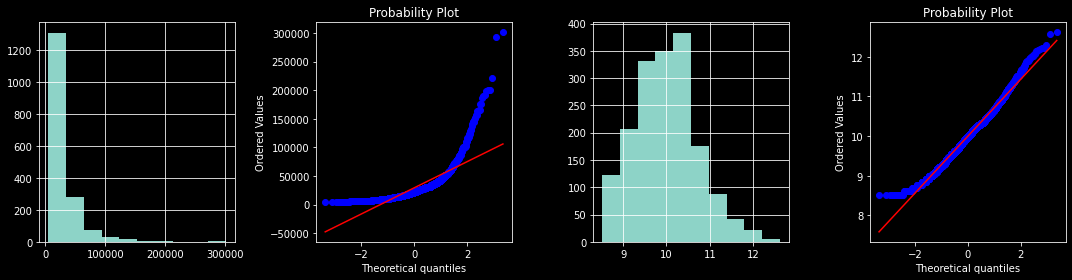

In [637]:
df['Сумма кредита log'] = np.log(df['Сумма кредита'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Сумма кредита'].hist(ax=axes[0])
stats.probplot(df['Сумма кредита'], dist="norm", plot=axes[1])
df['Сумма кредита log'].hist(ax=axes[2])
stats.probplot(df['Сумма кредита log'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

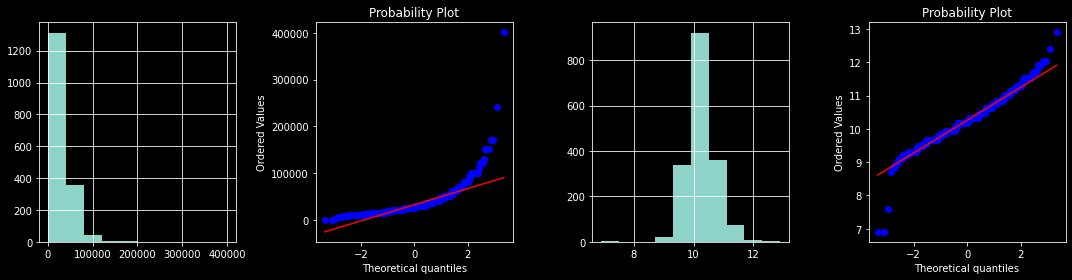

In [638]:
df['Доход клиента log'] = np.log(df['Доход клиента'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Доход клиента'].hist(ax=axes[0])
stats.probplot(df['Доход клиента'], dist="norm", plot=axes[1])
df['Доход клиента log'].hist(ax=axes[2])
stats.probplot(df['Доход клиента log'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

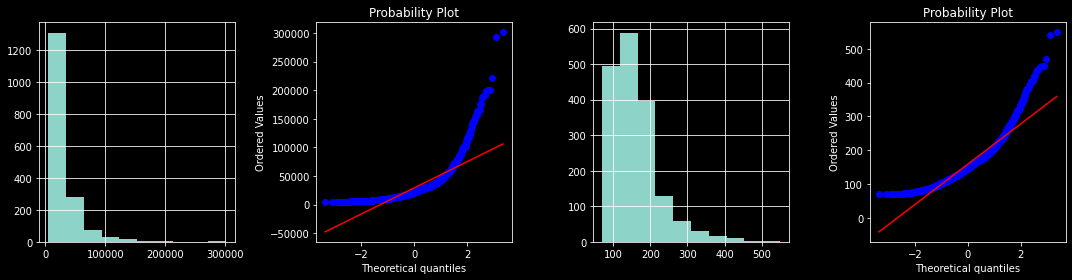

In [639]:
df['Сумма кредита sqrt'] = np.sqrt(df['Сумма кредита'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Сумма кредита'].hist(ax=axes[0])
stats.probplot(df['Сумма кредита'], dist="norm", plot=axes[1])
df['Сумма кредита sqrt'].hist(ax=axes[2])
stats.probplot(df['Сумма кредита sqrt'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

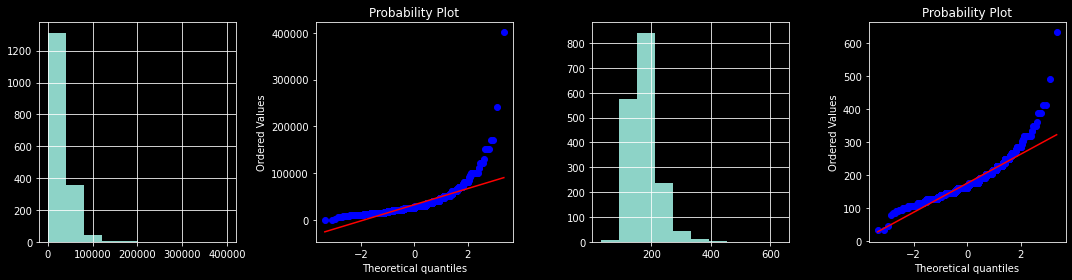

In [640]:
df['Доход клиента sqrt'] = np.sqrt(df['Доход клиента'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Доход клиента'].hist(ax=axes[0])
stats.probplot(df['Доход клиента'], dist="norm", plot=axes[1])
df['Доход клиента sqrt'].hist(ax=axes[2])
stats.probplot(df['Доход клиента sqrt'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

Логорифмирование лучше

### train/valid

In [641]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import shap 

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

import eli5
from sklearn.feature_selection import RFE

In [642]:
X = df.drop(columns='Флаг дефолта по кредиту')
Y = df['Флаг дефолта по кредиту'] 

In [643]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1378, 22), (345, 22), (1378,), (345,))

In [644]:
print(f'Количество строк в y_train по классам: {np.bincount(y_train)}')
print(f'Количество строк в y_valid по классам: {np.bincount(y_valid)}')

Количество строк в y_train по классам: [1221  157]
Количество строк в y_valid по классам: [306  39]


In [645]:
sc = StandardScaler()
sc.fit(x_train[num_col])

x_train[num_col] = sc.transform(x_train[num_col])
x_valid[num_col] = sc.transform(x_valid[num_col])

### LogisticRegression, SVC, CatBoostClassifier

In [646]:
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       306
           1       0.60      0.08      0.14        39

    accuracy                           0.89       345
   macro avg       0.75      0.54      0.54       345
weighted avg       0.86      0.89      0.85       345



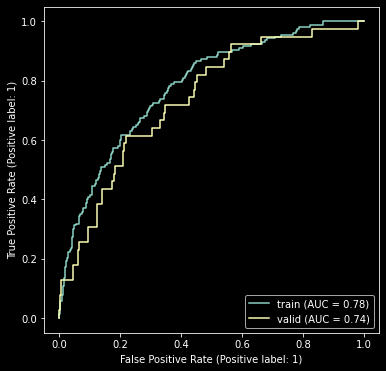

In [647]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [648]:
model_SVC = SVC(probability=True)
model_SVC.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_SVC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       306
           1       0.00      0.00      0.00        39

    accuracy                           0.89       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.79      0.89      0.83       345



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


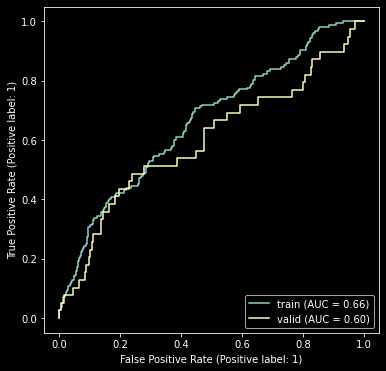

In [649]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_SVC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_SVC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [650]:
model_CBC = CatBoostClassifier(learning_rate=0.01, verbose=100, eval_metric='AUC')
model_CBC.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)

0:	test: 0.6269063	best: 0.6269063 (0)	total: 3.46ms	remaining: 3.45s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7640355287
bestIteration = 33

Shrink model to first 34 iterations.


In [651]:
print(classification_report(y_valid, model_CBC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       306
           1       0.00      0.00      0.00        39

    accuracy                           0.89       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.79      0.89      0.83       345



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


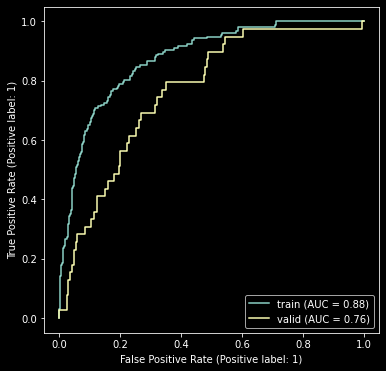

In [652]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

GridSearchCV

In [653]:
# params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 1]}
params = {'solver': ['liblinear'], 'C':[1], 'penalty': ['l1']}


grid_search_cv = GridSearchCV(model_LR, params, verbose=False, cv=5, scoring='roc_auc', n_jobs=5)
grid_search_cv.fit(x_train, y_train.to_numpy().ravel())

print(grid_search_cv.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [654]:
model_LR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_LR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       306
           1       0.80      0.10      0.18        39

    accuracy                           0.90       345
   macro avg       0.85      0.55      0.56       345
weighted avg       0.89      0.90      0.86       345



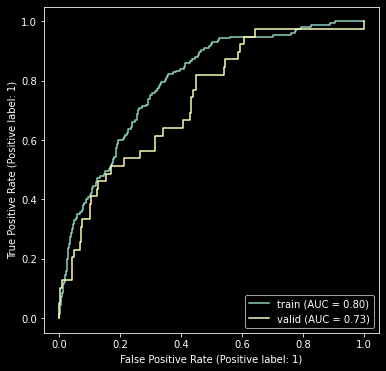

In [655]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [656]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

Weight?,Feature
+8.533,Тип товара
+4.988,Образование клиента
+0.420,Срок кредита
+0.178,Месяц выдачи кредита
+0.016,Сумма кредита sqrt
-0.002,Доход клиента sqrt
-0.227,Возраст клиента
-0.296,Доход клиента log
-0.304,Сумма кредита log
-0.547,Сумма кредита


In [657]:
params = {'iterations': [500],
          'depth': [1, 3, 5],
          'loss_function': ['Logloss', 'CrossEntropy', 'AUC'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]}
          
grid_search_cv = GridSearchCV(estimator=CatBoostClassifier(), param_grid=params, verbose=False, scoring='roc_auc', cv=5, n_jobs=5)
grid_search_cv.fit(x_train, y_train)

print(grid_search_cv.best_params_)


45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5126, in fit
    CatBoostClassifier._check_is_compatible_loss(params['loss_function'])
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5479, in _check_is_compatible_loss
    "Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll or custom objective object".format(loss_function))
_catboost.CatBoostError: Invalid loss_functi

{'depth': 1, 'iterations': 500, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42}


In [658]:
model_CBR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_CBR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       306
           1       0.67      0.10      0.18        39

    accuracy                           0.89       345
   macro avg       0.78      0.55      0.56       345
weighted avg       0.87      0.89      0.86       345



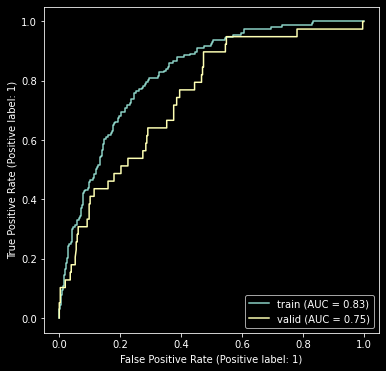

In [659]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [660]:
importances = model_CBR_best.feature_importances_
final_df = pd.DataFrame({'Признаки' : x_train.columns, 'Важность' : importances})
final_df.sort_values('Важность', ascending=False).head(10)

,Признаки,Важность
6,Тип товара,47.194792
2,Срок кредита,12.728012
5,Образование клиента,10.163450
3,Возраст клиента,5.906537
12,Является ли клиентом банка,3.446520
0,Месяц выдачи кредита,3.036975
13,Срок кредита bin,2.755384
19,Доход клиента log,2.479392
17,Сумма кредита bin,1.705387
8,Регион выдачи кредита,1.551948


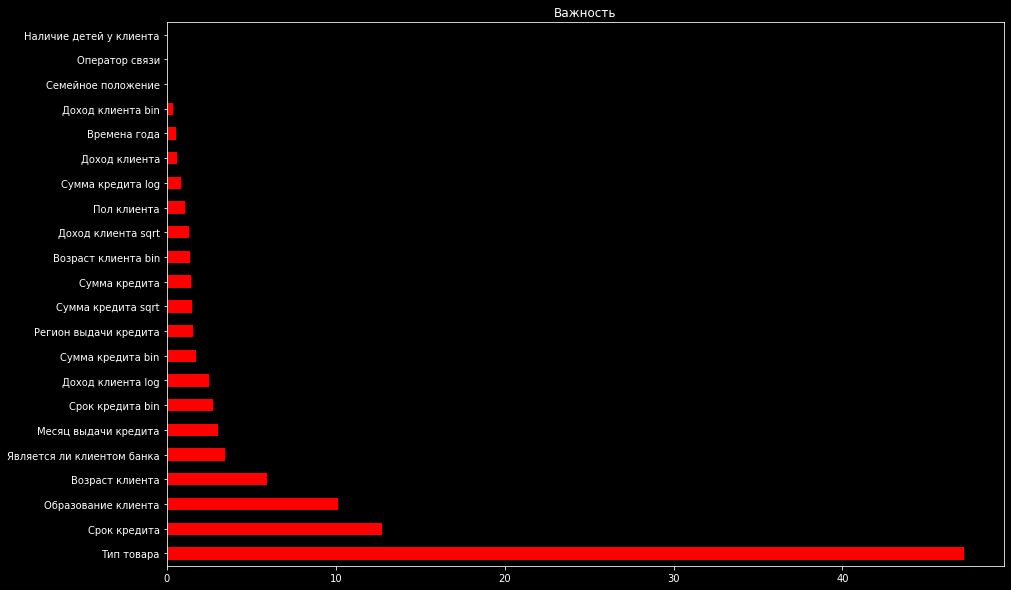

In [661]:
importances = model_CBR_best.feature_importances_
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat = pd.Series(importances, index= x_train.columns)
feature_importances_cat.nlargest(30).plot(kind='barh', color='r', align='center')
plt.title('Важность');

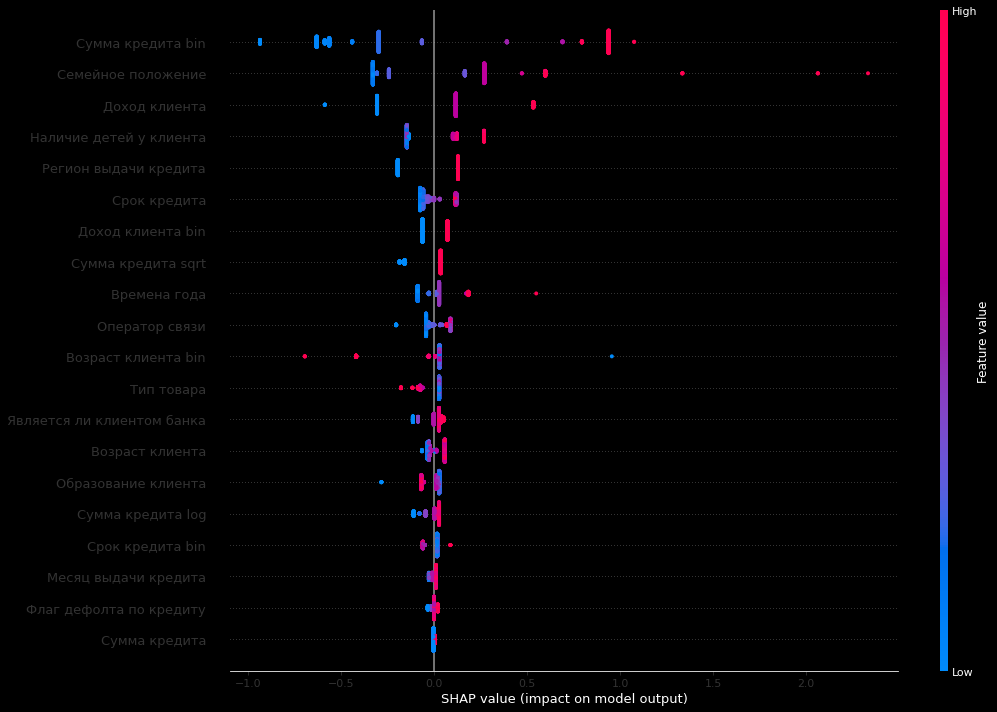

In [662]:
sorted_feature_importance = model_CBR_best.feature_importances_.argsort()
explainer = shap.TreeExplainer(model_CBR_best)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names = df.columns[sorted_feature_importance], plot_size=[15, 10]);

### Сэмплинг

In [664]:
from imblearn.over_sampling import SMOTE

# бороться с несбалансированностью буду с помощью увеличения числа экземпляров минорного класса. для этого выбран алгоритм smote семплинг
smt = SMOTE()
X_sm, Y_sm = smt.fit_resample(X, Y)

In [665]:
x_train, x_valid, y_train, y_valid = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((2443, 22), (611, 22), (2443,), (611,))

In [666]:
print(f'Количество строк в y_train по классам: {np.bincount(y_train)}')
print(f'Количество строк в y_valid по классам: {np.bincount(y_valid)}')

Количество строк в y_train по классам: [1222 1221]
Количество строк в y_valid по классам: [305 306]


In [667]:
sc = StandardScaler()
sc.fit(x_train[num_col])

x_train[num_col] = sc.transform(x_train[num_col])
x_valid[num_col] = sc.transform(x_valid[num_col])

### LogisticRegression, SVC, CatBoostClassifier

In [668]:
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       305
           1       0.73      0.78      0.75       306

    accuracy                           0.74       611
   macro avg       0.74      0.74      0.74       611
weighted avg       0.74      0.74      0.74       611



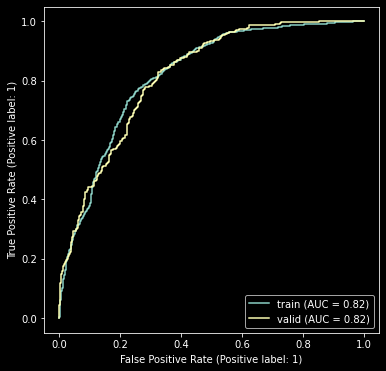

In [669]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [670]:
model_CBC = CatBoostClassifier(learning_rate=0.01, verbose=100, eval_metric='AUC')
model_CBC.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)

0:	test: 0.8811315	best: 0.8811315 (0)	total: 11.4ms	remaining: 11.4s
100:	test: 0.9676953	best: 0.9676953 (100)	total: 782ms	remaining: 6.96s
200:	test: 0.9707704	best: 0.9707704 (194)	total: 1.5s	remaining: 5.96s
300:	test: 0.9725919	best: 0.9726455 (293)	total: 2.23s	remaining: 5.17s
400:	test: 0.9739312	best: 0.9739526 (397)	total: 2.96s	remaining: 4.43s
500:	test: 0.9747241	best: 0.9748312 (489)	total: 3.69s	remaining: 3.68s
600:	test: 0.9757848	best: 0.9758491 (598)	total: 4.42s	remaining: 2.94s
700:	test: 0.9768670	best: 0.9768670 (700)	total: 5.15s	remaining: 2.19s
800:	test: 0.9775635	best: 0.9775849 (796)	total: 5.87s	remaining: 1.46s
900:	test: 0.9780456	best: 0.9780992 (875)	total: 6.57s	remaining: 722ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9780992178
bestIteration = 875

Shrink model to first 876 iterations.


In [671]:
print(classification_report(y_valid, model_CBC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       305
           1       0.98      0.90      0.94       306

    accuracy                           0.94       611
   macro avg       0.94      0.94      0.94       611
weighted avg       0.94      0.94      0.94       611



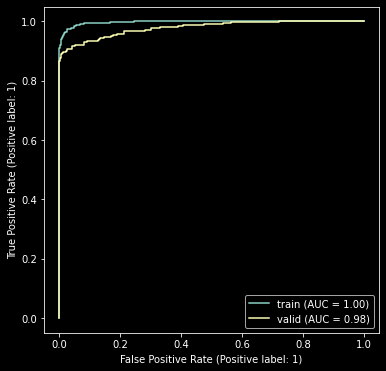

In [672]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

GridSearchCV

In [673]:
# params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 1]}
params = {'solver': ['liblinear'], 'C':[1], 'penalty': ['l1']}


grid_search_cv = GridSearchCV(model_LR, params, verbose=False, cv=5, scoring='roc_auc', n_jobs=5)
grid_search_cv.fit(x_train, y_train.to_numpy().ravel())

print(grid_search_cv.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [674]:
model_LR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_LR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       305
           1       0.73      0.79      0.76       306

    accuracy                           0.75       611
   macro avg       0.75      0.75      0.75       611
weighted avg       0.75      0.75      0.75       611



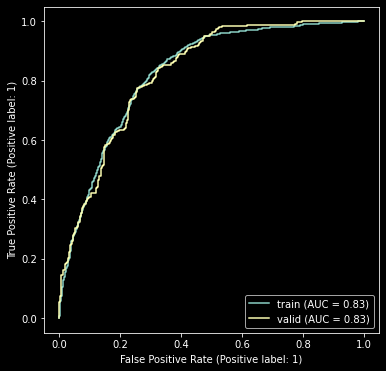

In [675]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [676]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

Weight?,Feature
+10.301,Тип товара
+9.346,Является ли клиентом банка
+6.975,Образование клиента
+5.805,Семейное положение
+1.261,Пол клиента
+0.894,Срок кредита
+0.024,Сумма кредита sqrt
+0.018,Месяц выдачи кредита
-0.001,Доход клиента sqrt
-0.158,Доход клиента


In [677]:
params = {'iterations': [500],
          'depth': [1, 3, 5],
          'loss_function': ['Logloss', 'CrossEntropy', 'AUC'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]}
          
grid_search_cv = GridSearchCV(estimator=CatBoostClassifier(), param_grid=params, verbose=False, scoring='roc_auc', cv=5, n_jobs=5)
grid_search_cv.fit(x_train, y_train)

print(grid_search_cv.best_params_)


45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5126, in fit
    CatBoostClassifier._check_is_compatible_loss(params['loss_function'])
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5479, in _check_is_compatible_loss
    "Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll or custom objective object".format(loss_function))
_catboost.CatBoostError: Invalid loss_functi

{'depth': 5, 'iterations': 500, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42}


In [678]:
model_CBR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_CBR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       305
           1       0.98      0.90      0.94       306

    accuracy                           0.94       611
   macro avg       0.94      0.94      0.94       611
weighted avg       0.94      0.94      0.94       611



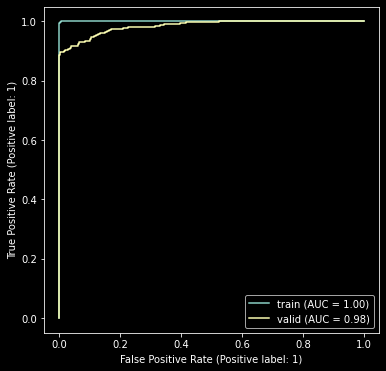

In [679]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [680]:
importances = model_CBR_best.feature_importances_
final_df = pd.DataFrame({'Признаки' : x_train.columns, 'Важность' : importances})
final_df.sort_values('Важность', ascending=False).head(10)

,Признаки,Важность
5,Образование клиента,8.454245
12,Является ли клиентом банка,7.626931
7,Наличие детей у клиента,6.736944
4,Пол клиента,6.638730
10,Семейное положение,6.196946
6,Тип товара,6.134366
2,Срок кредита,6.027597
11,Оператор связи,5.233084
0,Месяц выдачи кредита,4.828856
13,Срок кредита bin,4.648327


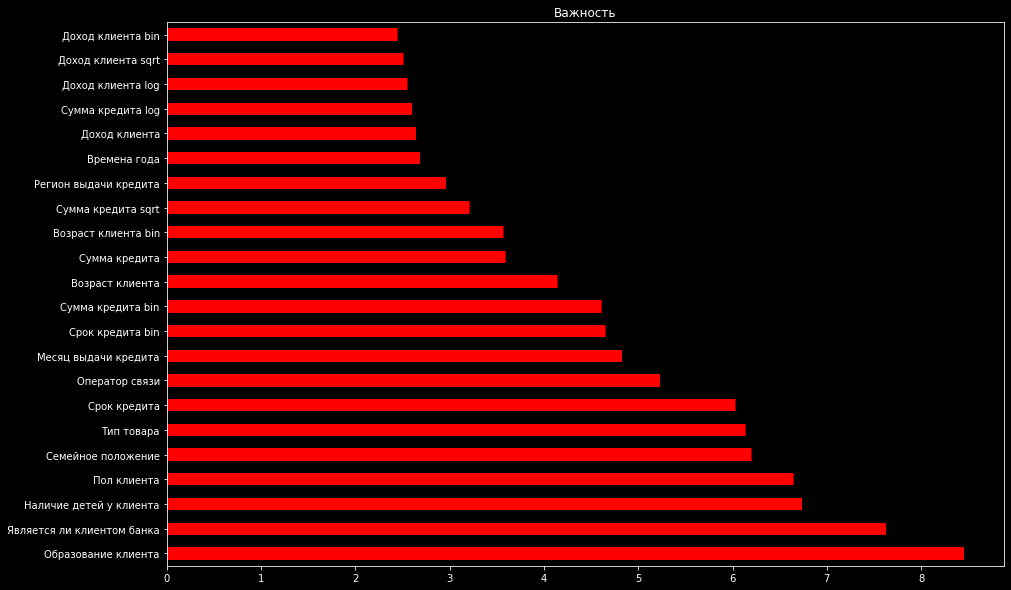

In [681]:
importances = model_CBR_best.feature_importances_
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat = pd.Series(importances, index= x_train.columns)
feature_importances_cat.nlargest(30).plot(kind='barh', color='r', align='center')
plt.title('Важность');

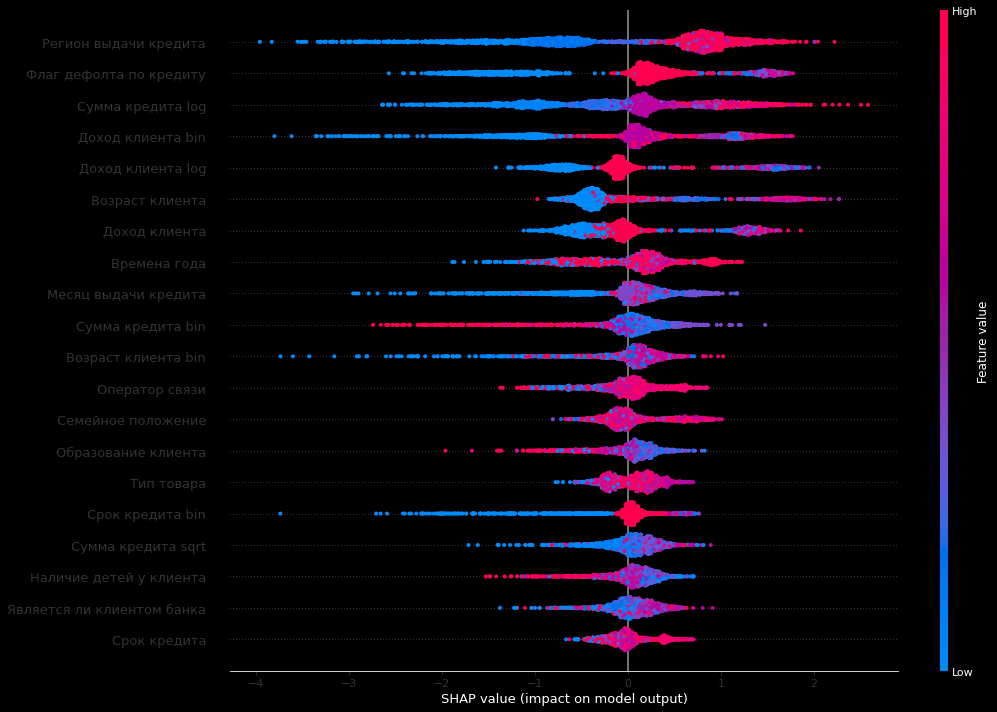

In [682]:
sorted_feature_importance = model_CBR_best.feature_importances_.argsort()
explainer = shap.TreeExplainer(model_CBR_best)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names = df.columns[sorted_feature_importance], plot_size=[15, 10]);

### Можно отобрать лучше фичи

In [683]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

Weight?,Feature
+10.301,Тип товара
+9.346,Является ли клиентом банка
+6.975,Образование клиента
+5.805,Семейное положение
+1.261,Пол клиента
+0.894,Срок кредита
+0.024,Сумма кредита sqrt
+0.018,Месяц выдачи кредита
-0.001,Доход клиента sqrt
-0.158,Доход клиента


In [684]:
rfe_LR = RFE(model_LR_best, n_features_to_select=13)
rfe_LR.fit(x_train, y_train.to_numpy().ravel())

RFE(estimator=LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                 solver='liblinear'),
    n_features_to_select=13)

In [685]:
print(classification_report(y_valid, rfe_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       305
           1       0.73      0.79      0.76       306

    accuracy                           0.75       611
   macro avg       0.75      0.75      0.75       611
weighted avg       0.75      0.75      0.75       611



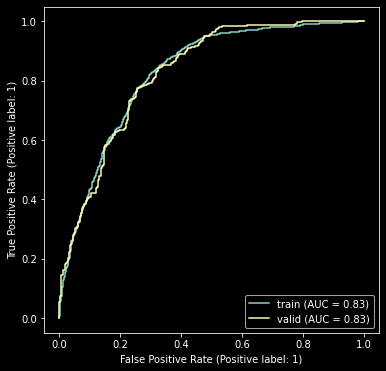

In [686]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, rfe_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, rfe_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);